# Homework 1: Getting Started with Probability 
 Pratham Mehta (cbm4kx)
 
 CS 3501: Foundations of Data Analysis
 
**Sources**
* https://www.geeksforgeeks.org/histograms-and-density-plots-in-python/
* https://pandas.pydata.org/docs/user_guide/10min.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.density.html


## Question 1

The UVA men’s and women’s basketball teams are both playing Virginia Tech on the same
day. There is a 60% chance that the UVA men win and a 60% chance that the UVA women
win. In addition, there is a 75% chance that UVA wins at least one of the games (that is,
they win the men’s game, or the women’s game, or both). Let M denote the event that the
UVA men win, and let W denote the event that the UVA women win.



a) What does $P(M \cup W)$  mean in English? What is its value?

> $P(M \cup W)$ represents the probability that either the UVA mens team or the UVA women team win their games. 
>
> $ P(M \cup W) = P(M) + P(W) - P(M \cap W) = 0.75$


 
b) What is the probability that UVA wins both games?

> $ P(M \cup W) = 0.75 $


c) What does $P(M \mid W)$  mean in English? What is its value?

> $P(M \mid W)$ represents the probability that the men's team wins, given that the women's team wins. We calculate it with the following: 
> 
> $P(M \mid W) = \frac{P(M \cap W)}{P(W)} = \frac{0.45}{0.6} = 0.75$

d) What is the probability that UVA wins **exactly** one game (men or women, but not both)?

> $P(M \cup W) - P(M \cap W) = 0.75 - 0.45 = 0.3$


e) If the UVA women lose, what is the probability that the UVA men also lose? 


> $P(\neg M \mid \neg W) = \frac{P(\neg M \cap \neg W)}{P(\neg W)} = \frac{0.15}{0.4} = 0.375$



## Question 2

You have two black socks, two white socks, two red socks, and two blue socks in your sock
drawer. If you pick two socks out at random (without looking!), what is the probability that
they match? Explain how you arrived at the answer, don’t just give a number!

> Getting matching socks randomly would mean we draw two socks of the same color consecutively. 
>
> For example, $P(S_1 = black)$ is the probability that the first sock is black. 
>   
>
> $ P(S_2 = black \mid S_1 = black)  +  P(S_2 = white \mid
 S_1 = white)  +  P(S_2 = red \mid
  S_1 = red)  + P(S_2 = blue \mid
   S_1 = blue)  = \\ $
> $ (\frac{2}{8})(\frac{1}{7}) * 4 = \frac{1}{7} $




## Question 3

According to the American Lung Association, there is a 0.13% chance to develop lung cancer.
Of the people who have lung cancer, 90% of them are smokers. In the population of people
who do not have lung cancer, 16.9% are smokers.


(a) What percentage of the total population are smokers?

> $P(S) = P(LC \cap S) + P(\neg LC \cap S) = 0.0017 + 0.1687 = 0.1704 $



(b) If you are a smoker, what is your probability to develop lung cancer?

> $ P(LC \mid S) = \frac{P(LC \cap S)} {P(\neg LC \cap S) + P(LC \cap S)} = \frac{0.0017} {0.0017 + 0.1687} = 0.0099765258216 $


(c) If you are not a smoker, what is your probability to develop lung cancer?

> $ P(LC \mid \neg S) = \frac {P(LC \cap  \neg S)} {P(LC \cap \neg S) + P(\neg LC \cap \neg S)} = \frac {0.00013}{0.00013 + 0.8299} = 0.00015661 $




## Question 4

Plot the data as a 2D scatterplot (right and left hippocampal volume as the two axes).
Use two different colors for the two classes (healthy/dementia). Do you think there is
separation between the two classes?

In [256]:
# Import libraries and read in data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pygments.lexers import math

df = pd.read_csv('OASIS-hippocampus.csv')
dementia_df = df[df['Dementia'] == 1]
healthy_df = df[df['Dementia'] == 0]

healthy_color = "green"
dementia_color = "red"

### Plotting Scatterplot 

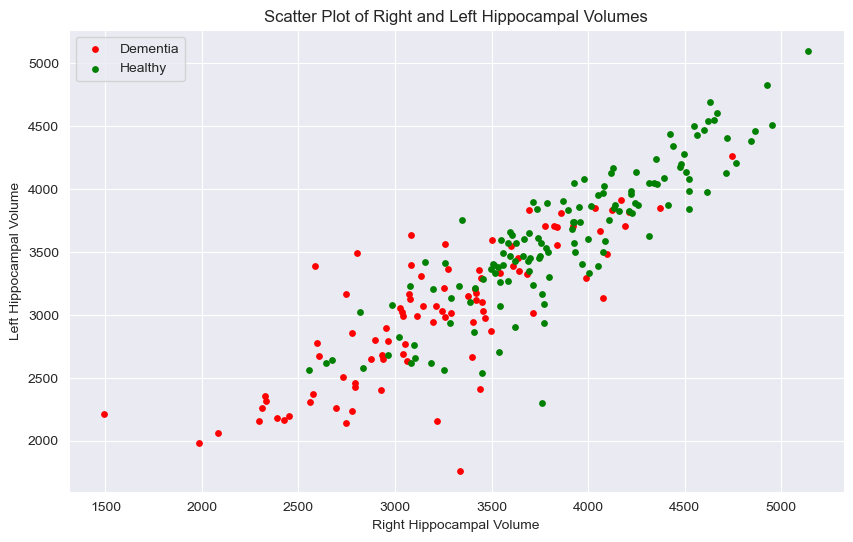

In [257]:
plt.figure(figsize=(10, 6))
plt.title('Scatter Plot of Right and Left Hippocampal Volumes')
plt.xlabel('Right Hippocampal Volume')
plt.ylabel('Left Hippocampal Volume')
plt.scatter(dementia_df["RightHippoVol"], dementia_df["LeftHippoVol"], color = dementia_color, label = "Dementia", s = 15)
plt.scatter(healthy_df["RightHippoVol"], healthy_df["LeftHippoVol"], color = healthy_color, label = "Healthy", s = 15)
plt.legend()
plt.show() 

There is a noticeable trend in the hippocampus volumes and a patient having dementia or being healthy. There is a slight area of confusion in the middle where all data points have similar hippocampus volumes, but could be classified as either having dementia or being healthy. However, as we go further up or down the x and y axis, the relationship becomes a lot more visible. In general, an increase in brain volume is correlated with lower rates of dementia, and a lower brain volume is correlated with higer rates of dementia. 

### Density Plots for Left Hippocampal Brain Volumes

Text(0.5, 0, 'Left Hippocampal Brain Volume')

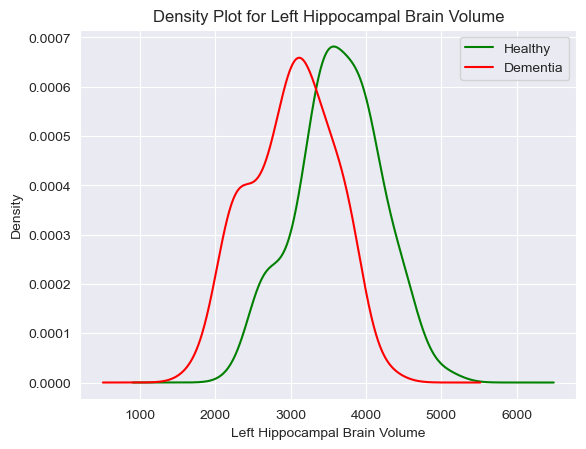

In [258]:
left_plot = healthy_df["LeftHippoVol"].plot.kde(color=healthy_color, title="Density Plot for Left Hippocampal Brain Volume", label="Healthy")
left_plot = dementia_df["LeftHippoVol"].plot.kde(color=dementia_color, label="Dementia")
left_plot.legend()
plt.xlabel("Left Hippocampal Brain Volume")


### Density Plots for Right Hippocampal Brain Volumes

Text(0.5, 0, 'Right Hippocampal Brain Volume')

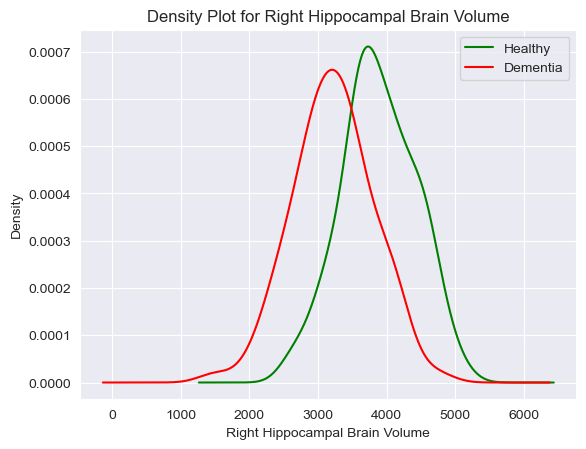

In [259]:
healthy_df["RightHippoVol"].plot.kde(color = healthy_color, title = "Density Plot for Right Hippocampal Brain Volume", label = "Healthy" )
dementia_df["RightHippoVol"].plot.kde(color = dementia_color, label = "Dementia")
plt.legend()
plt.xlabel("Right Hippocampal Brain Volume")

### Classifier - Model Training

In [260]:
# Create dataframes
df = pd.read_csv('OASIS-hippocampus.csv')

# Split into train and test splits
test_df = df[df['TrainData'] == 0]
train_df = df[df['TrainData'] == 1]

print(train_df.head())
print(test_df.head())


        ""             ID M.F Hand  Age  Educ  SES  MMSE  CDR  eTIV   nWBV  \
1        2  OAS1_0003_MR1   F    R   73     4  3.0    27  0.5  1454  0.708   
5       12  OAS1_0015_MR1   M    R   76     2  NaN    28  0.5  1738  0.719   
16      27  OAS1_0031_MR1   M    R   88     1  4.0    26  1.0  1419  0.674   
18      29  OAS1_0033_MR1   F    R   80     4  2.0    29  0.0  1323  0.735   
19      30  OAS1_0034_MR1   M    R   51     5  1.0    29  0.0  1538  0.831   

      ASF  Delay  RightHippoVol  LeftHippoVol  TrainData  Dementia  
1   1.207    NaN           2896          2801          1         1  
5   1.010    NaN           3052          2770          1         1  
16  1.236    NaN           2425          2167          1         1  
18  1.326    NaN           3773          2937          1         0  
19  1.141    NaN           4721          4409          1         0  
       ""             ID M.F Hand  Age  Educ  SES  MMSE  CDR  eTIV   nWBV  \
0       1  OAS1_0002_MR1   F    R   55  

In [261]:
healthy_train_df = train_df[train_df['Dementia'] == 0]
dementia_train_df = train_df[train_df['Dementia'] == 1]

print(healthy_train_df.head())
print(dementia_train_df.head())

        ""             ID M.F Hand  Age  Educ  SES  MMSE  CDR  eTIV   nWBV  \
18      29  OAS1_0033_MR1   F    R   80     4  2.0    29  0.0  1323  0.735   
19      30  OAS1_0034_MR1   M    R   51     5  1.0    29  0.0  1538  0.831   
24      39  OAS1_0044_MR1   F    R   47     4  2.0    30  0.0  1346  0.829   
28      51  OAS1_0058_MR1   F    R   46     5  1.0    30  0.0  1585  0.817   
30      55  OAS1_0062_MR1   F    R   73     3  2.0    30  0.0  1456  0.754   

      ASF  Delay  RightHippoVol  LeftHippoVol  TrainData  Dementia  
18  1.326    NaN           3773          2937          1         0  
19  1.141    NaN           4721          4409          1         0  
24  1.304    NaN           4602          4468          1         0  
28  1.107    NaN           4846          4384          1         0  
30  1.205    NaN           3519          3332          1         0  
        ""             ID M.F Hand  Age  Educ  SES  MMSE  CDR  eTIV   nWBV  \
1        2  OAS1_0003_MR1   F    R   73

In [262]:
healthy_probability = len(healthy_train_df) / (len(healthy_train_df) + len(dementia_train_df))
dementia_probability = len(dementia_train_df) / (len(dementia_train_df) + len(healthy_train_df))
print(f"Healthy Probability: {healthy_probability} |   Dementia Probability {dementia_probability}")
print(f"Total Probability: {healthy_probability + dementia_probability}")

left_healthy_mean = np.mean(healthy_train_df["LeftHippoVol"])
left_healthy_std = np.std(healthy_train_df["LeftHippoVol"])

right_healthy_mean = np.mean(healthy_train_df["RightHippoVol"])
right_healthy_std = np.std(healthy_train_df["RightHippoVol"])

left_dementia_mean = np.mean(dementia_train_df["LeftHippoVol"])
left_dementia_std = np.std(dementia_train_df["LeftHippoVol"])

right_dementia_mean = np.mean(dementia_train_df["RightHippoVol"])
right_dementia_std = np.std(dementia_train_df["RightHippoVol"])
    
# print(f"Left Healthy Mean: {left_healthy_mean}  Left Healthy Standard Deviation: {left_healthy_std}")
# print(f"Left Dementia Mean: {left_dementia_mean}  Left Dementia Standard Deviation: {left_dementia_std}")
# print(f"Right Healthy Mean: {right_healthy_mean}  Right Healthy Standard Deviation: {right_healthy_std}")
# print(f"Right Dementia Mean: {right_dementia_mean}  Right Dementia Standard Deviation: {right_dementia_std}")


Healthy Probability: 0.5892857142857143 |   Dementia Probability 0.4107142857142857
Total Probability: 1.0


In [263]:
# Adding Prediction column to hold our prediction for each patient
# Initializing to -1
print(test_df.shape[1])
test_df = test_df.assign(Prediction=-1)
print(test_df.head())
print(test_df.shape[1])

17
       ""             ID M.F Hand  Age  Educ  SES  MMSE  CDR  eTIV   nWBV  \
0       1  OAS1_0002_MR1   F    R   55     4  1.0    29  0.0  1147  0.810   
2       7  OAS1_0010_MR1   M    R   74     5  2.0    30  0.0  1636  0.689   
3       8  OAS1_0011_MR1   F    R   52     3  2.0    30  0.0  1321  0.827   
4      10  OAS1_0013_MR1   F    R   81     5  2.0    30  0.0  1664  0.679   
6      13  OAS1_0016_MR1   M    R   82     2  4.0    27  0.5  1477  0.739   

     ASF  Delay  RightHippoVol  LeftHippoVol  TrainData  Dementia  Prediction  
0  1.531    NaN           4230          3807          0         0          -1  
2  1.073    NaN           2832          2578          0         0          -1  
3  1.329    NaN           3978          4080          0         0          -1  
4  1.055    NaN           3557          3495          0         0          -1  
6  1.188    NaN           3421          3119          0         1          -1  
18


In [264]:
def gaussian_pdf(x, mean, std):
    return 1 / (np.sqrt(2 * np.pi) * std) * np.exp(-((x - mean) ** 2) / (2 * std ** 2))

def predict(row):
    # Calculate probabilities for healthy and dementia classes
    p_healthy = healthy_probability * \
                gaussian_pdf(row['LeftHippoVol'], left_healthy_mean, left_healthy_std) * \
                gaussian_pdf(row['RightHippoVol'], right_healthy_mean, right_healthy_std)

    p_dementia = dementia_probability * \
                 gaussian_pdf(row['LeftHippoVol'], left_dementia_mean, left_dementia_std) * \
                 gaussian_pdf(row['RightHippoVol'], right_dementia_mean, right_dementia_std)
    
    if p_healthy > p_dementia:
        return 0  # healthy
    else:
        return 1  # dementia


### Running and Testing Classifier

In [265]:
test_df.loc[:, 'Prediction'] = test_df.apply(predict, axis=1)

# Check accuracy
correct_count = 0
num_rows = test_df.shape[0]
for index, row in test_df.iterrows():
    if row["Dementia"] == row["Prediction"]:
        correct_count += 1
accuracy = round((correct_count / num_rows) * 100, 3)
print(f"This naive-bayes algorithm predicted whether a patient was healthy or had dementia correctly {accuracy}% of the time.")


This naive-bayes algorithm predicted whether a patient was healthy or had dementia correctly 70.796% of the time.
